In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [32]:
from timeit import default_timer as d_timer

In [25]:
#As in a previous work create random unweighted graph
n = 100  # 100 nodes
m = 500  # 500 edges
seed = 100  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)



In [27]:

edge_weights = np.array([[e, np.random.rand()] for e in G.edges()]) # shape (nb_edges, 2)
for e, weight in edge_weights:
    G[e[0]][e[1]]['weight'] = np.random.randint(100) # Adds weights to all edges ((G[(0,1)][(0,2)]) = {'weight': 0.59})
nodes = [n for n in G.nodes()]

#for edge in G.edges():
#    print(f"{edge[0]} -> {edge[1]} = {G[edge[0]][edge[1]]['weight']}")

#print()
#sorted_edges = sorted(G.edges(), key=lambda edge: G[edge[0]][edge[1]]['weight'])
#for edge in sorted_edges:
#    print(f"{edge[0]} -> {edge[1]} = {G[edge[0]][edge[1]]['weight']}")

/tmp/ipykernel_3378/1304188724.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  edge_weights = np.array([[e, np.random.rand()] for e in G.edges()]) # shape (nb_edges, 2)


Number of connected components 1


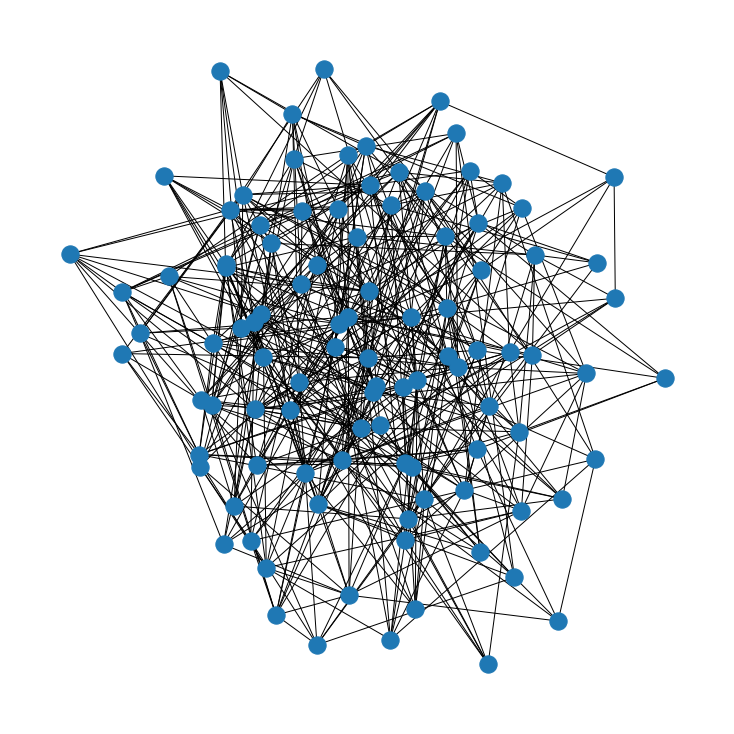

In [34]:
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos=pos)
print('Number of connected components', nx.number_connected_components(G))

plt.show()

In [31]:
A = nx.convert_matrix.to_numpy_array(G)
print(len(G.edges()))

500


In [ ]:
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos=pos)

plt.show()

In [35]:
timer_dijkstra = np.zeros(10)
timer_bel_ford = np.zeros(10)

for i in range(len(timer_dijkstra)):
    t0 = d_timer()
    nx.algorithms.shortest_paths.weighted.dijkstra_path(G, 3, 70)
    timer_dijkstra[i] = d_timer() - t0 

for i in range(len(timer_bel_ford)):
    t0 = d_timer()
    nx.algorithms.shortest_paths.weighted.bellman_ford_path(G, 3, 70)
    timer_bel_ford[i] = d_timer() - t0 

In [38]:
print(np.mean(timer_dijkstra))
print(np.mean(timer_bel_ford))

0.0007951703999424353
0.003949022500091814


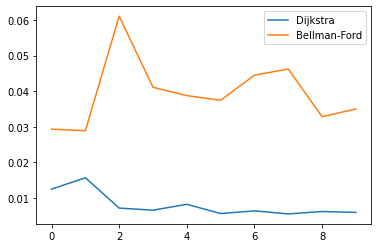

In [37]:
plt.plot(10*timer_dijkstra)
plt.plot(10*timer_bel_ford)
plt.legend(['Dijkstra', 'Bellman-Ford'])

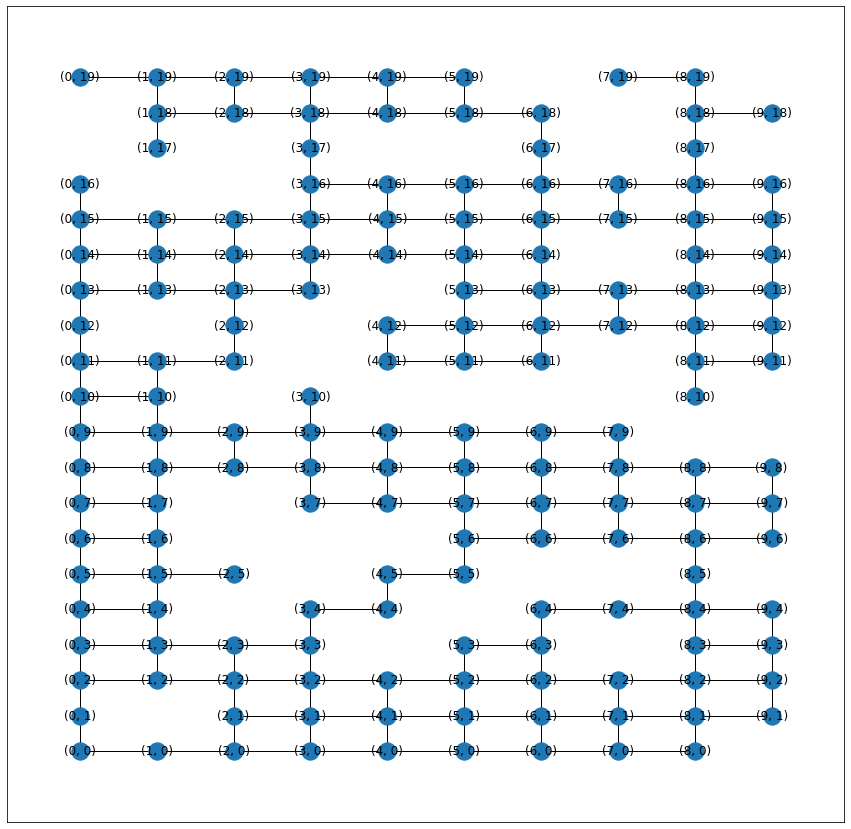

In [84]:
np.random.seed(100000)
G = nx.grid_2d_graph(10, 20)
while G.number_of_nodes()>160:
    tup = (np.random.randint(0, 10), np.random.randint(0, 20))
    if G.has_node(tup):
        G.remove_node(tup)
    else: continue
plt.figure(figsize = (15,15))
pos = dict((n, n) for n in G.nodes())
nx.draw_networkx(G, pos = pos)

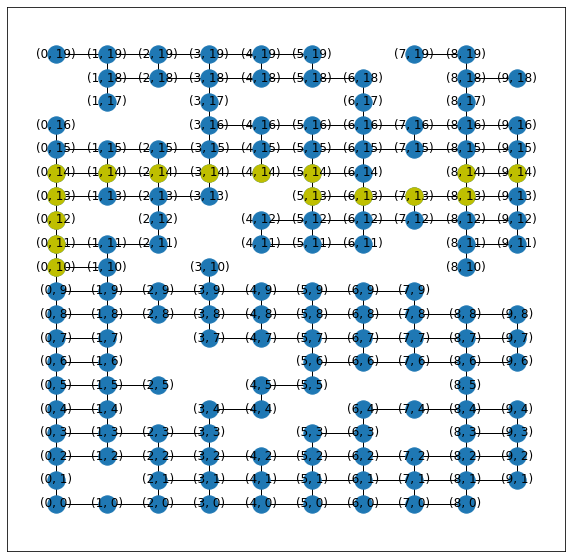

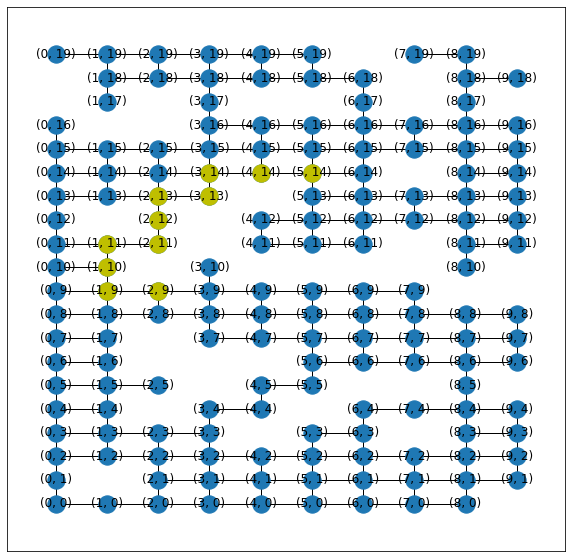

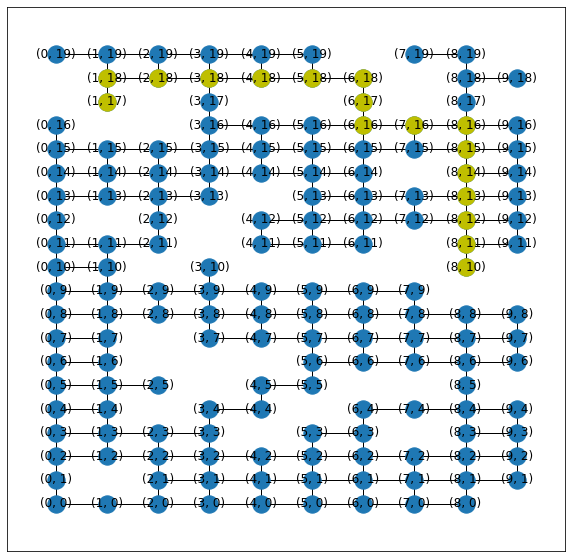

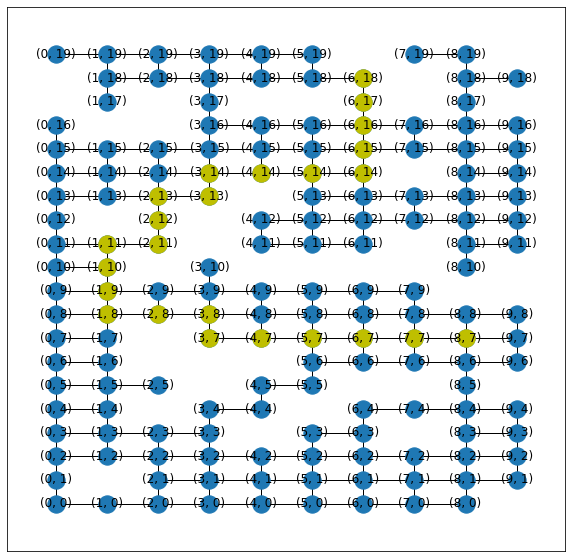

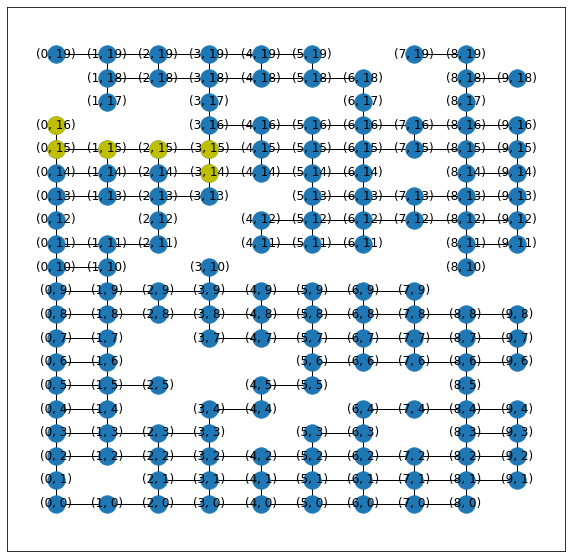

In [91]:
for i in range(5):
    source = (np.random.randint(0, 10), np.random.randint(0, 20))
    target = (np.random.randint(0, 10), np.random.randint(0, 20))
    SP_1 = nx.algorithms.shortest_paths.astar.astar_path(G, source, target)
    plt.figure(figsize = (10,10))
    nx.draw_networkx(G, pos = pos)
    nx.draw_networkx_nodes(G, pos, nodelist=SP_1, node_color='y')